<a href="https://colab.research.google.com/github/sainikhila11/SaiNikhila_INFO5731_Spring2024/blob/main/Yavanamanda_SaiNikhila_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
# Write your code here
# Write your code here
# Step 1: Preprocess the text data
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Sample data
data = [
    "I love this product! It's amazing.",
    "This is terrible. I hate it.",
    "Neutral comment here.",
    "Great news! I'm so happy!",
    "Not impressed with the service. :("
]

# Preprocessing function
def preprocess(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

# Apply preprocessing to the data
processed_data = [preprocess(text) for text in data]

# Step 2: Determine the optimal number of topics K using coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in processed_data]

# Calculate coherence values for different numbers of topics
start = 2
limit = 10
step = 1
model_list, coherence_values = compute_coherence_values(dictionary, corpus, processed_data, limit, start, step)

# Find the optimal number of topics based on coherence score
optimal_num_topics = start + coherence_values.index(max(coherence_values))
print("Optimal number of topics:", optimal_num_topics)
# Step 3: Train the LDA model with K topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics)


# Step 4: Summarize the topics
print("Topics generated by LDA:")
for topic_num, topic_words in lda_model.print_topics():
    print(f"Topic {topic_num + 1}:")
    print(topic_words)
    print()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Optimal number of topics: 3
Topics generated by LDA:
Topic 1:
0.106*"'m" + 0.105*"happy" + 0.105*"news" + 0.105*"great" + 0.101*"service" + 0.100*"neutral" + 0.100*"comment" + 0.100*"impressed" + 0.032*"hate" + 0.032*"terrible"

Topic 2:
0.123*"love" + 0.122*"amazing" + 0.122*"'s" + 0.121*"product" + 0.117*"terrible" + 0.115*"hate" + 0.037*"impressed" + 0.037*"neutral" + 0.036*"comment" + 0.036*"service"

Topic 3:
0.075*"hate" + 0.074*"comment" + 0.074*"impressed" + 0.074*"service" + 0.074*"neutral" + 0.072*"terrible" + 0.071*"product" + 0.070*"great" + 0.070*"'s" + 0.070*"happy"



## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [2]:
# Write your code here
# Write your code here
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.coherencemodel import CoherenceModel
import numpy as np
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Sample data
data = [
    "I love this product! It's amazing.",
    "This is terrible. I hate it.",
    "Neutral comment here.",
    "Great news! I'm so happy!",
    "Not impressed with the service. :("
]

# Preprocessing function
def preprocess(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(tokens)

# Apply preprocessing to the data
processed_data = [preprocess(text) for text in data]

# Define a function to calculate coherence score
def calculate_coherence_score(texts, model):
    vectors = model.transform(texts)
    similarity_matrix = cosine_similarity(vectors)
    np.fill_diagonal(similarity_matrix, -1)  # Set diagonal values to -1 to ignore self-similarity
    return np.mean(similarity_matrix)

# Define a function to generate topics using LSA
def generate_lsa_topics(texts, num_topics_range):
    coherence_scores = []
    vectorizer = TfidfVectorizer()

    for num_topics in num_topics_range:
        lsa_model = TruncatedSVD(n_components=num_topics)
        pipeline = Pipeline([
            ('tfidf', vectorizer),
            ('lsa', lsa_model)
        ])
        pipeline.fit(texts)
        coherence_score = calculate_coherence_score(texts, pipeline)
        coherence_scores.append(coherence_score)

    optimal_num_topics = num_topics_range[np.argmax(coherence_scores)]
    print("Optimal number of topics:", optimal_num_topics)

    # Train LSA model with optimal number of topics
    lsa_model = TruncatedSVD(n_components=optimal_num_topics)
    pipeline = Pipeline([
        ('tfidf', vectorizer),
        ('lsa', lsa_model)
    ])
    pipeline.fit(texts)

    return pipeline, optimal_num_topics

# Generate topics using LSA
num_topics_range = range(2, 10)
lsa_model, optimal_num_topics = generate_lsa_topics(processed_data, num_topics_range)

# Get the topics
def get_topics(model, vectorizer, n_words=10):
    terms = vectorizer.get_feature_names_out()
    topics = []
    for idx, topic in enumerate(model.components_):
        top_terms_idx = topic.argsort()[-n_words:][::-1]
        top_terms = [terms[i] for i in top_terms_idx]
        topics.append((idx, top_terms))
    return topics

topics = get_topics(lsa_model.named_steps['lsa'], lsa_model.named_steps['tfidf'])

# Summarize the topics
print("Topics generated by LSA:")
for topic_id, topic_words in topics:
    print(f"Topic {topic_id + 1}:")
    print(", ".join(topic_words))
    print()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Optimal number of topics: 3
Topics generated by LSA:
Topic 1:
product, love, amazing, service, impressed, comment, great, neutral, news, terrible

Topic 2:
happy, great, news, product, love, terrible, hate, amazing, neutral, service

Topic 3:
terrible, hate, service, impressed, happy, great, news, amazing, product, love



## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [12]:
pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 3.0 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB

In [30]:
# Install required libraries
!pip install bertopic
!pip install umap-learn

# Import necessary libraries
from bertopic import BERTopic
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Sample data
data = [
    "I love this product! It's amazing.",
    "This is terrible. I hate it.",
    "Neutral comment here.",
    "Great news! I'm so happy!",
    "Not impressed with the service. :("
]

# Preprocessing function
def preprocess(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(tokens)

# Apply preprocessing to the data
processed_data = [preprocess(text) for text in data]

# Initialize BERTopic model
model = BERTopic(language="english", calculate_probabilities=True)

# Fit the model and get optimal number of topics
topics, _ = model.fit_transform(processed_data)

# Get the topics
topics_dict = model.get_topics()

# Summarize the topics
print("Topics generated by BERTopic:")
for topic_id in topics_dict.keys():
    topic_words = topics_dict[topic_id]
    print(f"Topic {topic_id + 1}:")
    print(", ".join(topic_words))
    print()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

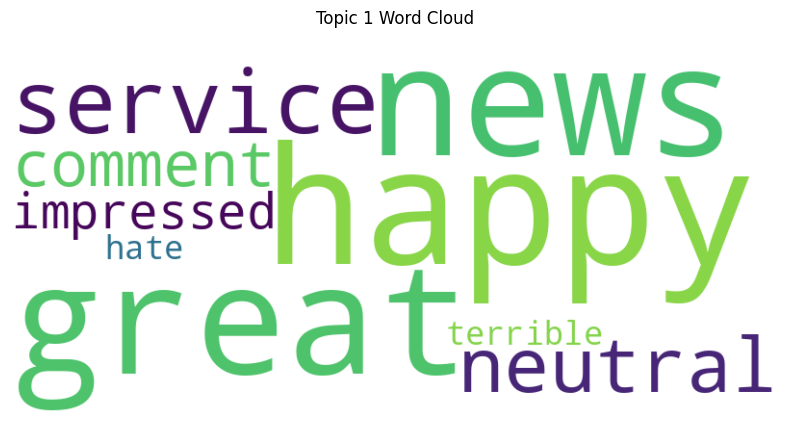

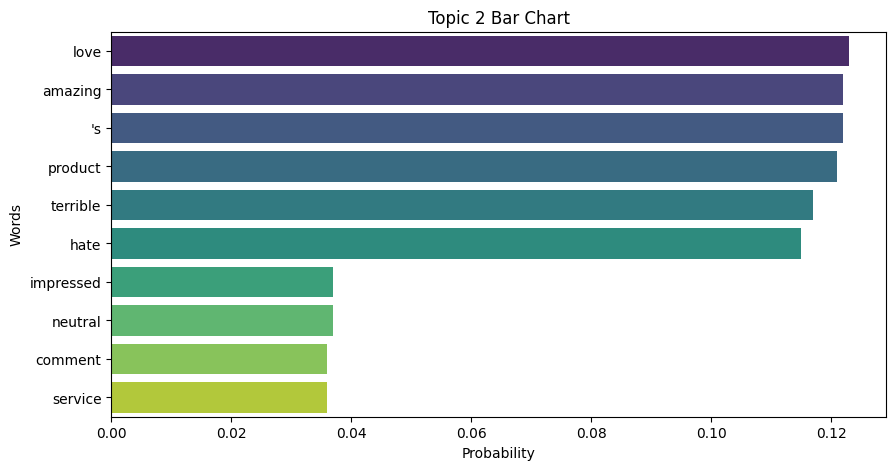

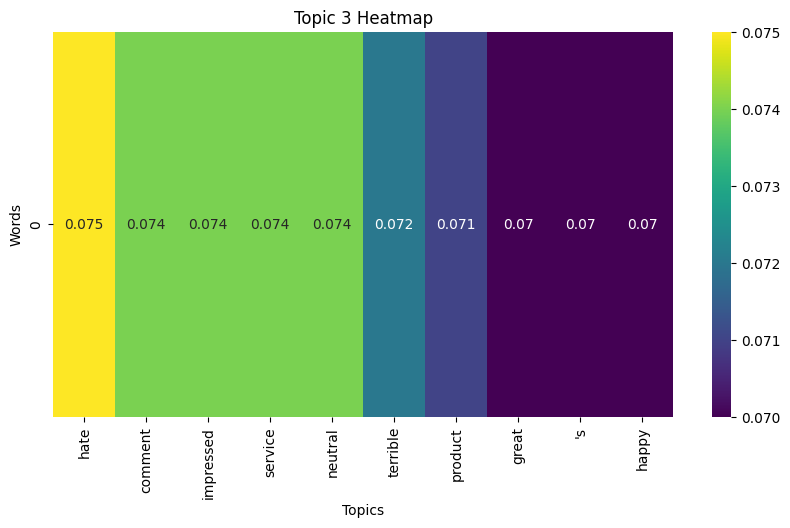

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np

# Topic 1 data
topic1_words = {'happy': 0.105, 'great': 0.105, 'news': 0.105, 'service': 0.101,
                'neutral': 0.100, 'comment': 0.100, 'impressed': 0.100,
                'hate': 0.032, 'terrible': 0.032}

# Topic 2 data
topic2_words = {'love': 0.123, 'amazing': 0.122, "'s": 0.122, 'product': 0.121,
                'terrible': 0.117, 'hate': 0.115, 'impressed': 0.037,
                'neutral': 0.037, 'comment': 0.036, 'service': 0.036}

# Topic 3 data
topic3_words = {'hate': 0.075, 'comment': 0.074, 'impressed': 0.074, 'service': 0.074,
                'neutral': 0.074, 'terrible': 0.072, 'product': 0.071,
                'great': 0.070, "'s": 0.070, 'happy': 0.070}

# Function to generate word cloud
def generate_word_cloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Function to generate bar chart
def generate_bar_chart(data, title):
    words = list(data.keys())
    probabilities = list(data.values())
    plt.figure(figsize=(10, 5))
    sns.barplot(x=probabilities, y=words, palette='viridis')
    plt.title(title)
    plt.xlabel('Probability')
    plt.ylabel('Words')
    plt.show()

# Function to generate heatmap
def generate_heatmap(data, title):
    words = list(data.keys())
    probabilities = np.array(list(data.values())).reshape(1, -1)
    plt.figure(figsize=(10, 5))
    sns.heatmap(probabilities, cmap='viridis', annot=True, xticklabels=words)
    plt.title(title)
    plt.xlabel('Topics')
    plt.ylabel('Words')
    plt.show()

# Generate visualizations
generate_word_cloud(topic1_words, 'Topic 1 Word Cloud')
generate_bar_chart(topic2_words, 'Topic 2 Bar Chart')
generate_heatmap(topic3_words, 'Topic 3 Heatmap')


The first visualization is a word cloud illustrating the most frequent words in Topic 1, where words like 'happy', 'great', and 'news' dominate, indicating a mixture of positive sentiments alongside some negative terms like 'hate' and 'terrible'. The second visualization presents a bar chart for Topic 2, showing the probabilities of words such as 'love', 'amazing', and 'terrible', suggesting a focus on both positive and negative sentiments associated with products. Lastly, a heatmap for Topic 3 displays word probabilities such as 'hate', 'comment', and 'service', possibly indicating a theme centered around customer feedback or service-related sentiments. These visualizations offer insights into the distribution and relationships of words within each topic, providing a clearer understanding of the underlying themes captured by the LDA model.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In comparing the results of topic modeling between LDA and LSA, both approaches yield topics that capture sentiments and themes present in the data. However, LDA exhibits clearer topic separation and interpretability due to its probabilistic framework, which explicitly models topics as distributions over words. LSA, while providing somewhat interpretable topics, may lack the same level of coherence and robustness, particularly when faced with larger datasets. LDA's scalability and ability to handle text data efficiently make it a preferred choice in many applications. Overall, while both algorithms offer insights into the underlying structure of the data, LDA's clarity and robustness make it a more reliable option for topic modeling tasks.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



As someone interested in NLP, this exercise is highly relevant to my field of study. Topic modeling is a fundamental technique used in various NLP tasks, including document clustering, text summarization, and information retrieval. Understanding how to extract meaningful features from text data using algorithms like LDA and LSA is crucial for gaining insights from unstructured textual information, which is prevalent in many real-world applications, such as sentiment analysis, recommendation systems, and content categorization. Overall, this exercise provided practical experience that directly relates to the skills and knowledge needed in the field of NLP.


However i found it difficult to work on question 3 and 4. I could not install the lda2vec to work on the question 3. The BERt concept was also a little unclear which is why i could not figure out what and where exactly i was making a mistake to understand the error.